In [5]:
using Plots

In [3]:
function generatesomedata(N, fun)
	X = zero(rand(N))
	Y = zero(rand(N))
	for i in 1:N
		X[i] = i
		Y[i] = fun(i) + rand(1)[1] + rand(1)[1]*(i-50)
	end
	return X, Y
end

function fun(x)
	return 1/x * x^2 - 1/x^4 + sin(x) * 40*x
end

fun (generic function with 1 method)

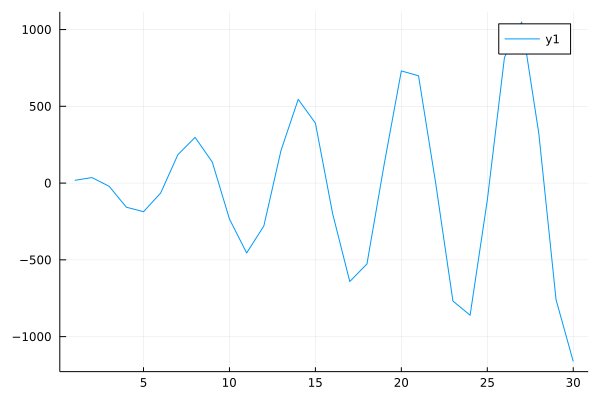

In [6]:
X, Y = generatesomedata(30, fun)
plot(X, Y)

In [7]:
# fit polynomial function to data
function model(w, X)
    sol = w[1] * X
    for i in 2:length(w)
        sol += w[i] * X.^i
    end
    return sol
end

model (generic function with 1 method)

2734.9650326240912


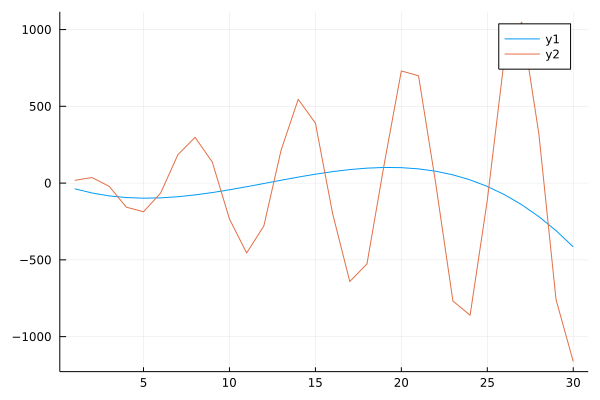

In [8]:
include("gauss_newton_method.jl")

## 3rd order 
w = gaussnewton(model, X, Y, ones(3))
Y_pred = model(w, X)
plot(X, [Y_pred, Y])

1811.956857797645


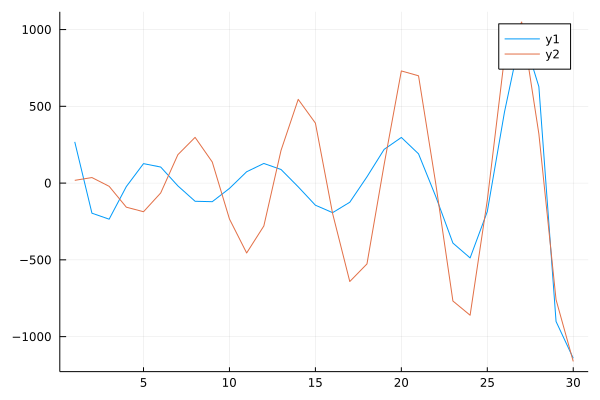

In [9]:
## 11 order
w = gaussnewton(model, X, Y, ones(11))
Y_pred = model(w, X)
plot(X, [Y_pred, Y])